# Lecture 3: Linear Basis Expansions

These methods replace the function $\hat{f}$ with

$$\hat{f}(x_i)=\theta^Th(x_i) = \sum\limits_{m=0}^M \theta_m h_m(x_i)$$

for some user-selected functions $h_0$, ..., $h_M$ and we denote

$$
h(x_i)=\begin{pmatrix}h_0(x_i)\\
\vdots \\
h_M(x_i)
\end{pmatrix}
$$

Notice that $h$ is a function mapping $\mathbb{R}^d$ to $\mathbb{R}^{M+1}$ for some positive integer $M$.

If $d=1$, some common examples are polynomials of degree $\leq M$ ($h_m(x)=x^m$) or trig functions with different periods. It should not be surprising that these are common if you recall that Taylor polynomials and Fourier sums are good at approximating many functions with finite numbers of terms. Taking logs or exponentials of variables is also common, but the possibilities are endless.

If $d\geq 2$, one common approach is to fit arbitrary polynomials below a certain degree. For example, if we had $x_i=(x_{i1}, x_{i2})$, we could use

$$
\begin{align}
&h_0(x_i) = 1\\
&h_1(x_i) = x_{i1}, h_2(x_i) = x_{i2}\\
&h_3(x_i) = x_{i1}^2, h_4(x_i) = x_{i1}x_{i2}, h_5(x_i) = x_{i2}^2
\end{align}
$$

which would allow us to fit any polynomial of degree $\leq 2$,

$$
\hat{f}(x_i) = \theta_0 + \theta_1x_{i1} + \theta_2x_{i2} + \theta_3x_{i3} + \theta_{11}x_{i1}^2 + \theta_{12}x_{i1}x_{i2} + \theta_{22}x_{i2}^2
$$

Note that, regardless of what the basis functions $h_m$ are, $\hat{f}$ is still linear with respect to the model parameters $\theta_i$. Thus, if we create a modified data matrix,

$$
X_h=\begin{pmatrix}
h_0(x_1) & h_1(x_1) & \cdots &  h_M(x_1)\\
h_0(x_2) & h_1(x_2) & \cdots &  h_M(x_2)\\
\vdots & \vdots & \ddots & \vdots\\
h_0(x_n) & h_1(x_n) & \cdots &  h_M(x_n)
\end{pmatrix}
$$

Then, we can express $\hat{f}$ as

$$\hat{f}(X)=X_h\theta$$

and we can express the loss function as

$$L(\theta) = \left\|X_h\theta-y\right\|_2^2 + \lambda\theta^T\theta$$

This is the same loss function we minimized before except the known numerical matrix $X$ has changed to this *preprocessed* version $X_h$. Still, it is contant with respect to the model parameters $\theta_i$, so the optimal parametrs will simply change to

$$\theta = \left(X_h^TX_h\right)^{-1}X_h^Ty$$

## 1D Polynomial-Fitting Example

Let's create a linear basis of degree $M$ polynomials. The function will return a function

$$
h(x_i)=\begin{pmatrix}
1\\
x_i\\
x_i^2\\
\vdots \\
x_i^M
\end{pmatrix}
$$

And we will then use it to fit a polynomial.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [12]:
# return polynomial basis functions for degree M and d=1
def univariatePolynomialBasis(M):
    def polynomialM(x):
        # create an empty array
        out = np.array([])
        
        # create the output
        for i in range(M+1):
            # append x^i
            out = np.append(out, x ** i)
        
        # return the polynomial values
        return out
    print(polynomialM)
    
    # return the polynomial function
    return polynomialM

Let's test these basis functions.

In [13]:
# create basis functions for degree-5 polynomials
poly = univariatePolynomialBasis(5)

# plug in a simple value to make sure it works right
print(poly(2))

# apply the polynomial basis to each row of data
print(np.apply_along_axis(poly, 1, np.array([[-1], [2], [3]])))

<function univariatePolynomialBasis.<locals>.polynomialM at 0x0000020922FB83A0>
[ 1.  2.  4.  8. 16. 32.]
[[  1.  -1.   1.  -1.   1.  -1.]
 [  1.   2.   4.   8.  16.  32.]
 [  1.   3.   9.  27.  81. 243.]]


Great! It outputs $x_i^0$, $x_i^1$, ..., $x_i^5$, as we hoped.

Next, let's use the scikit-learn implementation of linear regression to try to fit polynomials of different degrees to some simple data. First, we simply apply the basis to the data and plug it into the method.

**Note**: We could lightly modify the linear regression function we wrote last week and use it instead, but it's generally better to use the optimized versions of machine learning algorithms built into scikit-learn when possible. Sometimes, we may want to do something novel, however, in which case it is important to be able to write your own implementations.

1
<function univariatePolynomialBasis.<locals>.polynomialM at 0x00000209231FF520>
The theta values are [1.2 0.7]
The r^2 score is 0.9423076923076923
The mean absolute error is 0.20000000000000034
2
<function univariatePolynomialBasis.<locals>.polynomialM at 0x00000209232101F0>
The theta values are [ 1.05714286  0.98571429 -0.07142857]
The r^2 score is 0.9560439560439561
The mean absolute error is 0.17142857142857162
3
<function univariatePolynomialBasis.<locals>.polynomialM at 0x00000209232109D0>
The theta values are [ 0.95714286  1.70238095 -0.57142857  0.08333333]
The r^2 score is 0.9752747252747254
The mean absolute error is 0.13714285714285768
4
<function univariatePolynomialBasis.<locals>.polynomialM at 0x0000020923211240>
The theta values are [ 1.         -0.08333333  1.875      -0.91666667  0.125     ]
The r^2 score is 1.0
The mean absolute error is 3.9523939676655574e-15
5
<function univariatePolynomialBasis.<locals>.polynomialM at 0x0000020923210D30>
The theta values are [ 1. 

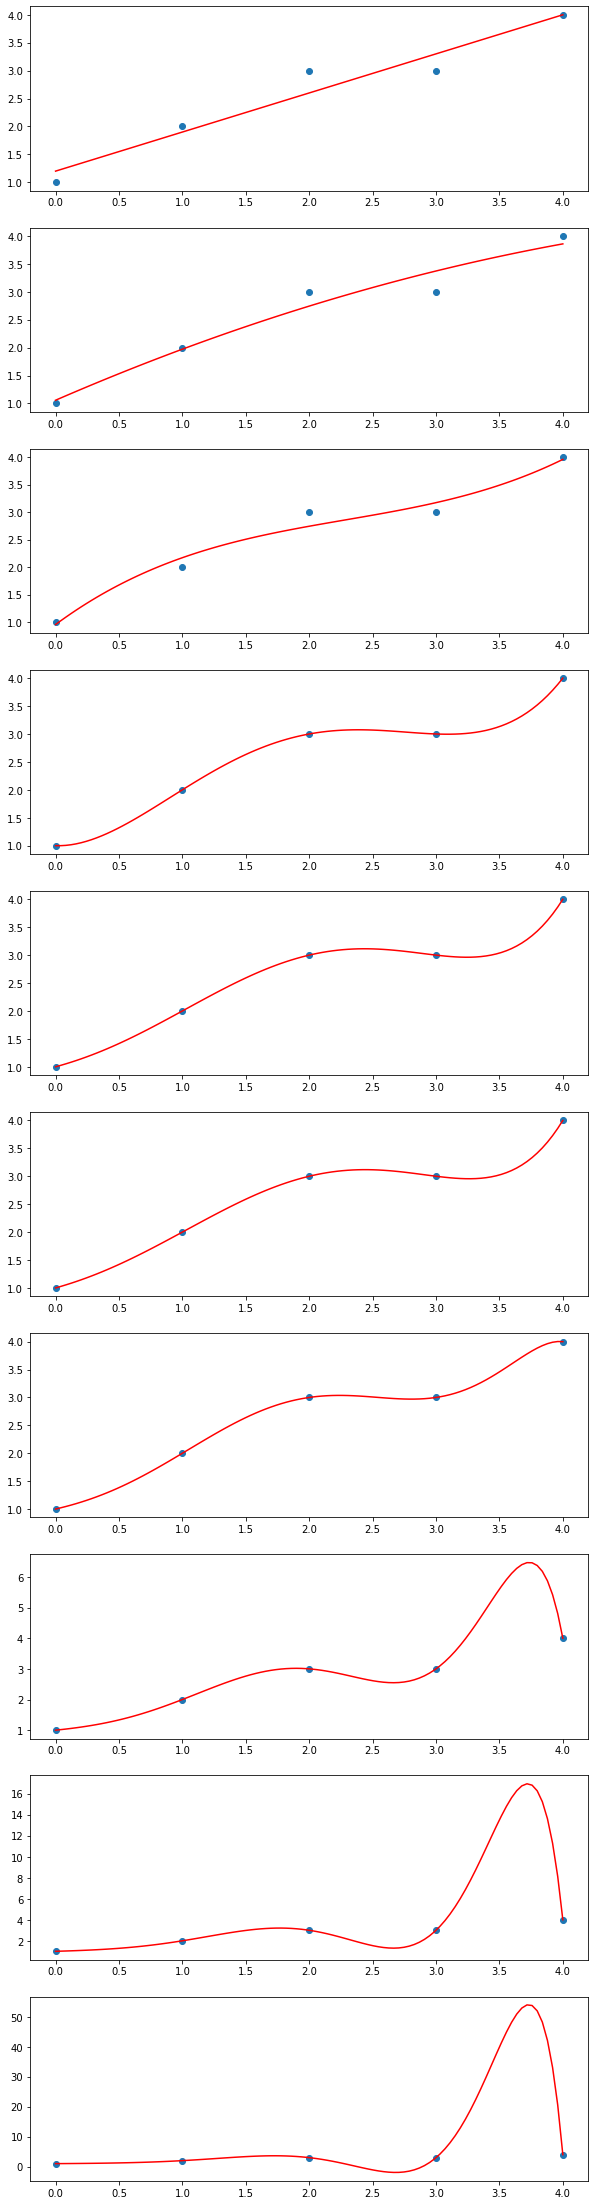

In [14]:
# create some simple data
X = np.array([[0], [1], [2], [3], [4]])
y = np.array([1, 2, 3, 3, 4])

# import scikit-learn's linear regression implementation
from sklearn.linear_model import LinearRegression

# try polynomials up to degree 10
M = 10

# allow multipleplots
fig, axes = plt.subplots(nrows = M, figsize = (10, 4 * M))

# iterate from 1 to M
for i in range(1, M + 1):
    # print the degree
    print(i)
    
    # create the degree i polynomial basis
    poly = univariatePolynomialBasis(i)
    
    # apply the basis functions to the data
    Xh = np.apply_along_axis(poly, 1, X)

    # fit the model
    model = LinearRegression(fit_intercept = False)
    model.fit(Xh, y)
    
    # predict the outputs
    predictions = model.predict(Xh)

    # save the coefficients
    parameters = model.coef_
    print('The theta values are', parameters)

    # plot the training points
    axes[i - 1].scatter(X, y, label = 'Training Data')

    # plot the fitted model with the training data
    xModel = np.atleast_2d(np.linspace(X[0][0],X[-1][0],100)).T
    
    # compute the predicted outputs
    yModel = np.sum(parameters * np.apply_along_axis(poly, 1, xModel), axis = 1)
    
    # plot the model
    axes[i - 1].plot(xModel, yModel, 'r')

    # print quality metrics
    print('The r^2 score is', r2_score(y, predictions))
    print('The mean absolute error is', mean_absolute_error(y, predictions))

We see some interesting behavior. The quality metrics improve as we fit higher degree polynomials: $r^2$ increases more and more each time and the error shrinks. However, the graphs reveal some worrying behavior. The higher-degree models toward the end fit the points perfectly (hence, huge $r^2$ and tiny error), but intuitively, it seems they would doing a *worse* job of making predictions because they have these huge maxima between the last two points.

Here, we see $r^2$ and error are not sufficient for telling us how good a model is likely to perform. This is why it's typical to test models on a test dataset that the model has not seen to check the quality. Let's try this in the next example.

## Shampoo Sales Dataset Example

The data we will use is a small dataset showing the total sales of a certain shampoo by a hair product company per year. Let's take a look at it.

In [16]:
# read the shampoo sales dataset
data = pd.read_csv('../data/shampoo.csv')

# save the targets
y = data['Sales'].to_numpy()

# make a column vector of 0s with n elements
X = np.zeros([y.shape[0], 1])

# convert the vector to (0, 1, 2, ..., n)
X[:,0] = [i for i in range(y.shape[0])]
    
# split the data into train and test sets
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size = 0.25, random_state = 1)

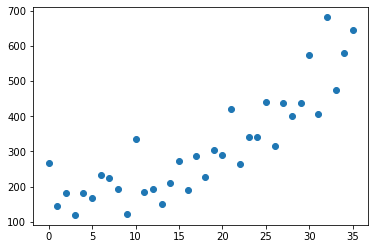

In [17]:
# plot the data
plt.scatter(X, y)

Again, this data is not really linear, but seems to have an exponential growth pattern, although the growth rate is not clear. So, let's fit a curve to it of the form

$$
f(x_i)=\theta_{-M}e^{-x_i}+\theta_{-M+1}e^{-\frac{M-1}{M}x_i}+\cdots+\theta_{-1}e^{-\frac{1}{M}x_i}+\theta_0+\theta_1e^{\frac{1}{M}x_i}+\cdots+\theta_Me^{x_i}
$$

for some natural number $M\in\mathbb{N}$.

First, define the basis.

In [18]:
# return polynomial basis functions for d=1
def expBasis(M):
    def exponential(x):
        # create an empty array
        out = np.array([])
        
        # create the output
        for i in range(-M, M + 1):
            # append x^i
            out = np.append(out, np.exp(x*i/M))
        
        # return the polynomial values
        return out
    
    # return the polynomial function
    return exponential

Next, let's test the basis.

In [19]:
a = expBasis(3)
a(1)

array([0.36787944, 0.51341712, 0.71653131, 1.        , 1.39561243,
       1.94773404, 2.71828183])

This looks okay, as we have three negative exponent terms, the 0 exponent term, and 3 positive exponent terms.

1
[-6.08410009e+01  2.74106659e+02  2.84217094e-13]
The r^2 score is 0.31670914741290446
The mean absolute error on the training set is 92.84993382106069
The mean absolute error on the testing set is 126.50284535699858
2
[-2.39601206e+01 -1.78237447e+01  2.43533206e+02  3.53455277e-05
 -6.35047570e-13]
The r^2 score is 0.635573885349446
The mean absolute error on the training set is 68.83602114048293
The mean absolute error on the testing set is 122.79665420082337
3
[-7.65004093e+00 -8.19024314e+00  5.89885446e+00  2.16030070e+02
  2.41640381e-02 -4.87360841e-07  2.66275890e-12]
The r^2 score is 0.7856106341157338
The mean absolute error on the training set is 50.83005027572462
The mean absolute error on the testing set is 89.03925788376091
4
[ 9.50833728e+01  6.87083509e+01 -8.89326124e+00 -1.17894436e+02
  2.14664524e+02  3.12419812e-01 -1.01773834e-04  1.22157768e-08
 -3.55271368e-13]
The r^2 score is 0.8308890006930142
The mean absolute error on the training set is 43.7211318530432

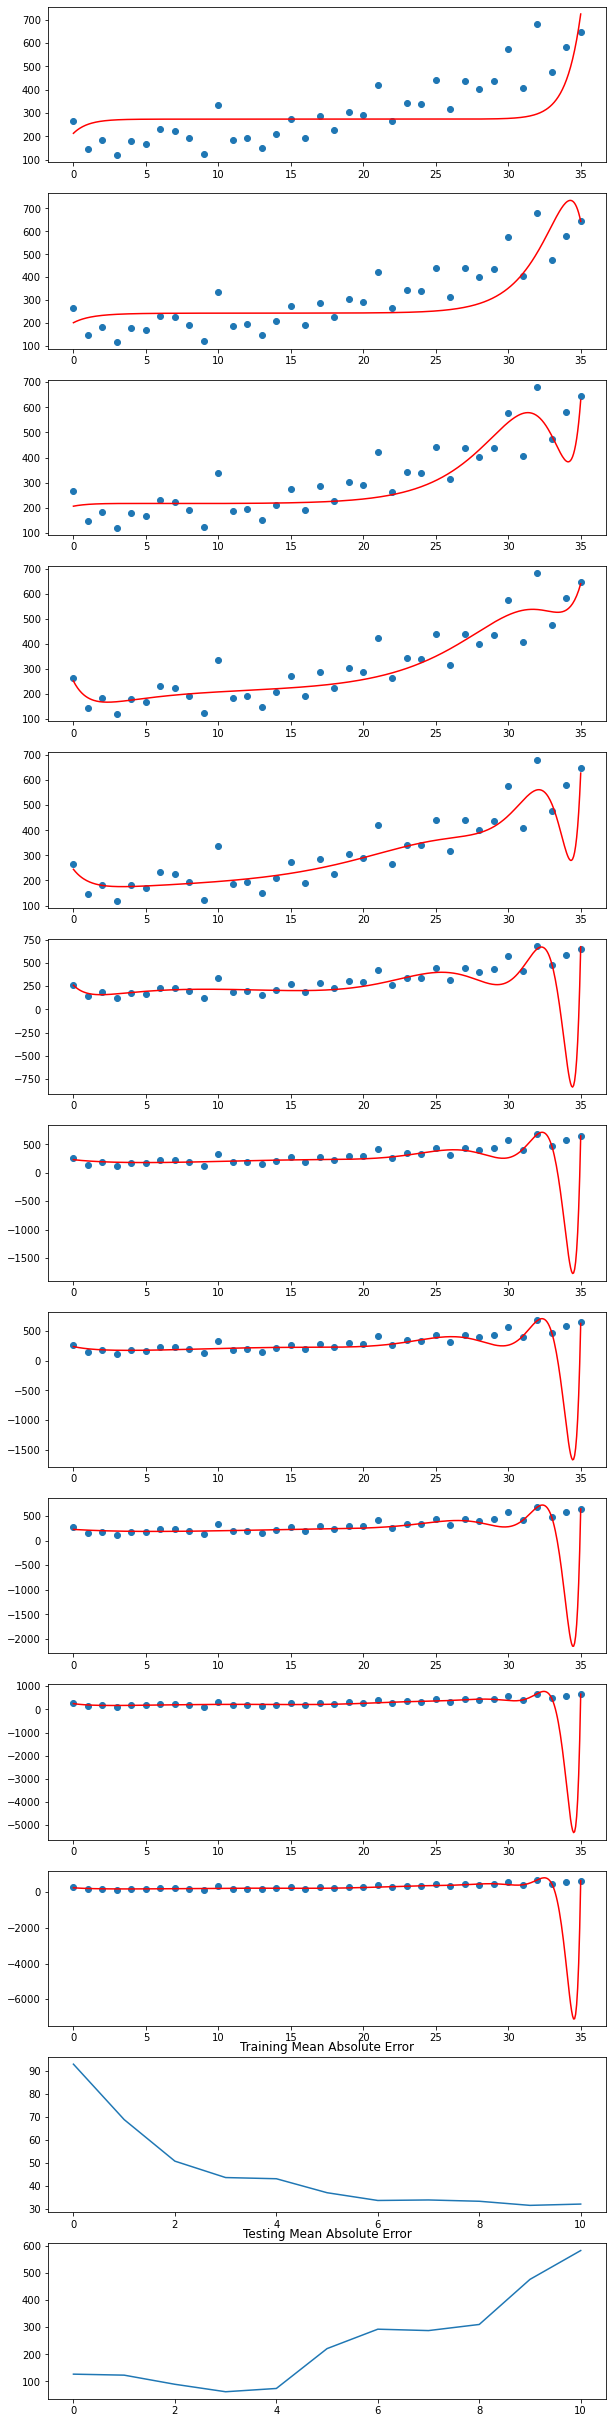

In [20]:
from sklearn.linear_model import LinearRegression

# try basis of up to 20 terms
M = 11

# allow multiple plots
fig, axes = plt.subplots(nrows = M + 2, figsize = (10, 4 * M))

trainMAE = []
testMAE = []

# iterate over each basis size
for i in range(1, M + 1):
    # print basis size
    print(i)
    
    # construct the basis
    exp = expBasis(i)
    
    # apply the basis functions to X
    trainXh = np.apply_along_axis(exp, 1, trainX)

    # fit the model
    model = LinearRegression(fit_intercept = False)
    model.fit(trainXh, trainY)
    
    # predict the outputs
    trainPredictions = model.predict(trainXh)

    # save the coefficients
    parameters = model.coef_
    print(parameters)

    # plot the training points
    axes[i - 1].scatter(X, y, label = 'Training Data')

    # plot the fitted model with the training data
    xModel = np.atleast_2d(np.linspace(0,35,500)).T
    
    # compute the predicted outputs
    yModel = np.sum(parameters * np.apply_along_axis(exp, 1, xModel), axis = 1)
    
    # plot the model
    axes[i - 1].plot(xModel, yModel, 'r')
    
    # apply the basis functions to the test data and predict with the model
    testXh = np.apply_along_axis(exp, 1, testX)
    testPredictions = model.predict(testXh)
    
    # compute the training and test mean absolute error
    trainError = mean_absolute_error(trainY, trainPredictions)
    testError = mean_absolute_error(testY, testPredictions)
    
    # save the training and test mean absolute error
    trainMAE.append(trainError)
    testMAE.append(testError)

    # return quality metrics
    print('The r^2 score is', r2_score(trainY, trainPredictions))
    print('The mean absolute error on the training set is', trainError)
    print('The mean absolute error on the testing set is', testError)
    
# plot the errors
axes[M].plot(range(M), trainMAE)
axes[M].title.set_text('Training Mean Absolute Error')

axes[M+1].plot(range(M), testMAE)
axes[M+1].title.set_text('Testing Mean Absolute Error')

We see a similar pattern as with the polynomals here, where some terms help, but adding more and more causes some big deviations from the data. From the last two graphs, we see that the training error continues to fall, but the test error falls until about $M=3$ and then starts growing. In other words, the model *generalizes* best to the testing data it has never seen at some intermediate amount of model complexity.